In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Load

In [2]:
df = pd.read_csv('./train.csv')
total_df = df.drop(columns = ['ID'])

total_df

,propertyType,bedrooms,latitude,longitude,suburbName,distanceMetro(km),distanceAirport(km),distanceHospital(km),distanceRailway(km),area(square_meters),monthlyRent(us_dollar)
0,Apartment,3,28.638710,77.295822,Delhi East,0.312579,22.646032,11.726966,7.352495,83.61,307
1,Independent Floor,1,28.498940,77.207191,Delhi South,2.486167,13.500583,7.527761,15.877066,83.61,110
2,Independent Floor,3,28.714123,77.154404,Delhi North,1.528794,18.918243,17.135939,10.315737,78.97,369
3,Independent Floor,3,28.704330,77.149956,Other,0.967121,17.749252,16.251937,9.797817,162.58,676
4,Apartment,4,28.577915,77.049446,Dwarka,0.834506,4.288189,15.541840,18.179806,218.32,418
...,...,...,...,...,...,...,...,...,...,...,...
8687,Apartment,1,28.602234,77.026001,Dwarka,0.005681,7.776390,18.212199,19.535831,46.45,159
8688,Apartment,1,28.644989,77.169296,Delhi Central,0.007987,12.969368,9.442664,5.039023,81.29,172
8689,Independent Floor,3,28.547377,77.259155,Delhi South,0.203502,17.094466,5.468956,11.109941,148.64,738
8690,Independent Floor,1,28.630501,77.277382,Delhi East,0.248603,20.628700,9.801128,5.679541,41.90,184


In [4]:
# 질적 변수
qual_df = total_df[['propertyType', 'suburbName']]

# 양적 변수
quan_df = total_df.drop(columns = ['propertyType', 'suburbName'])

# Data Summary

In [6]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8692 entries, 0 to 8691
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   propertyType            8692 non-null   object 
 1   bedrooms                8692 non-null   int64  
 2   latitude                8692 non-null   float64
 3   longitude               8692 non-null   float64
 4   suburbName              8692 non-null   object 
 5   distanceMetro(km)       8692 non-null   float64
 6   distanceAirport(km)     8692 non-null   float64
 7   distanceHospital(km)    8692 non-null   float64
 8   distanceRailway(km)     8692 non-null   float64
 9   area(square_meters)     8692 non-null   float64
 10  monthlyRent(us_dollar)  8692 non-null   int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 747.1+ KB


In [7]:
total_df.describe()

,bedrooms,latitude,longitude,distanceMetro(km),distanceAirport(km),distanceHospital(km),distanceRailway(km),area(square_meters),monthlyRent(us_dollar)
count,8692.000000,8692.000000,8692.000000,8692.000000,8692.000000,8692.000000,8692.000000,8692.000000,8692.000000
mean,2.119650,28.611199,77.167464,0.869998,13.699359,11.373803,11.419991,101.990737,321.376898
std,0.900757,0.070853,0.093600,1.261337,7.926709,7.500915,7.345131,59.355027,230.962181
min,1.000000,26.467743,76.742523,0.002892,1.901789,0.669150,0.722023,9.290000,14.000000
25%,1.000000,28.563490,77.102028,0.459687,11.152285,8.167231,8.075549,55.740000,159.000000
50%,2.000000,28.616885,77.168053,0.698592,13.139656,10.922441,11.244344,83.610000,258.000000
75%,3.000000,28.651827,77.224998,1.092694,17.225196,15.548549,15.435535,139.350000,393.000000
max,8.000000,28.872597,80.339027,65.866623,396.043067,387.016246,390.969378,882.580000,1476.000000


# Visualization

## 양적 변수 분포 확인 :히스토그램

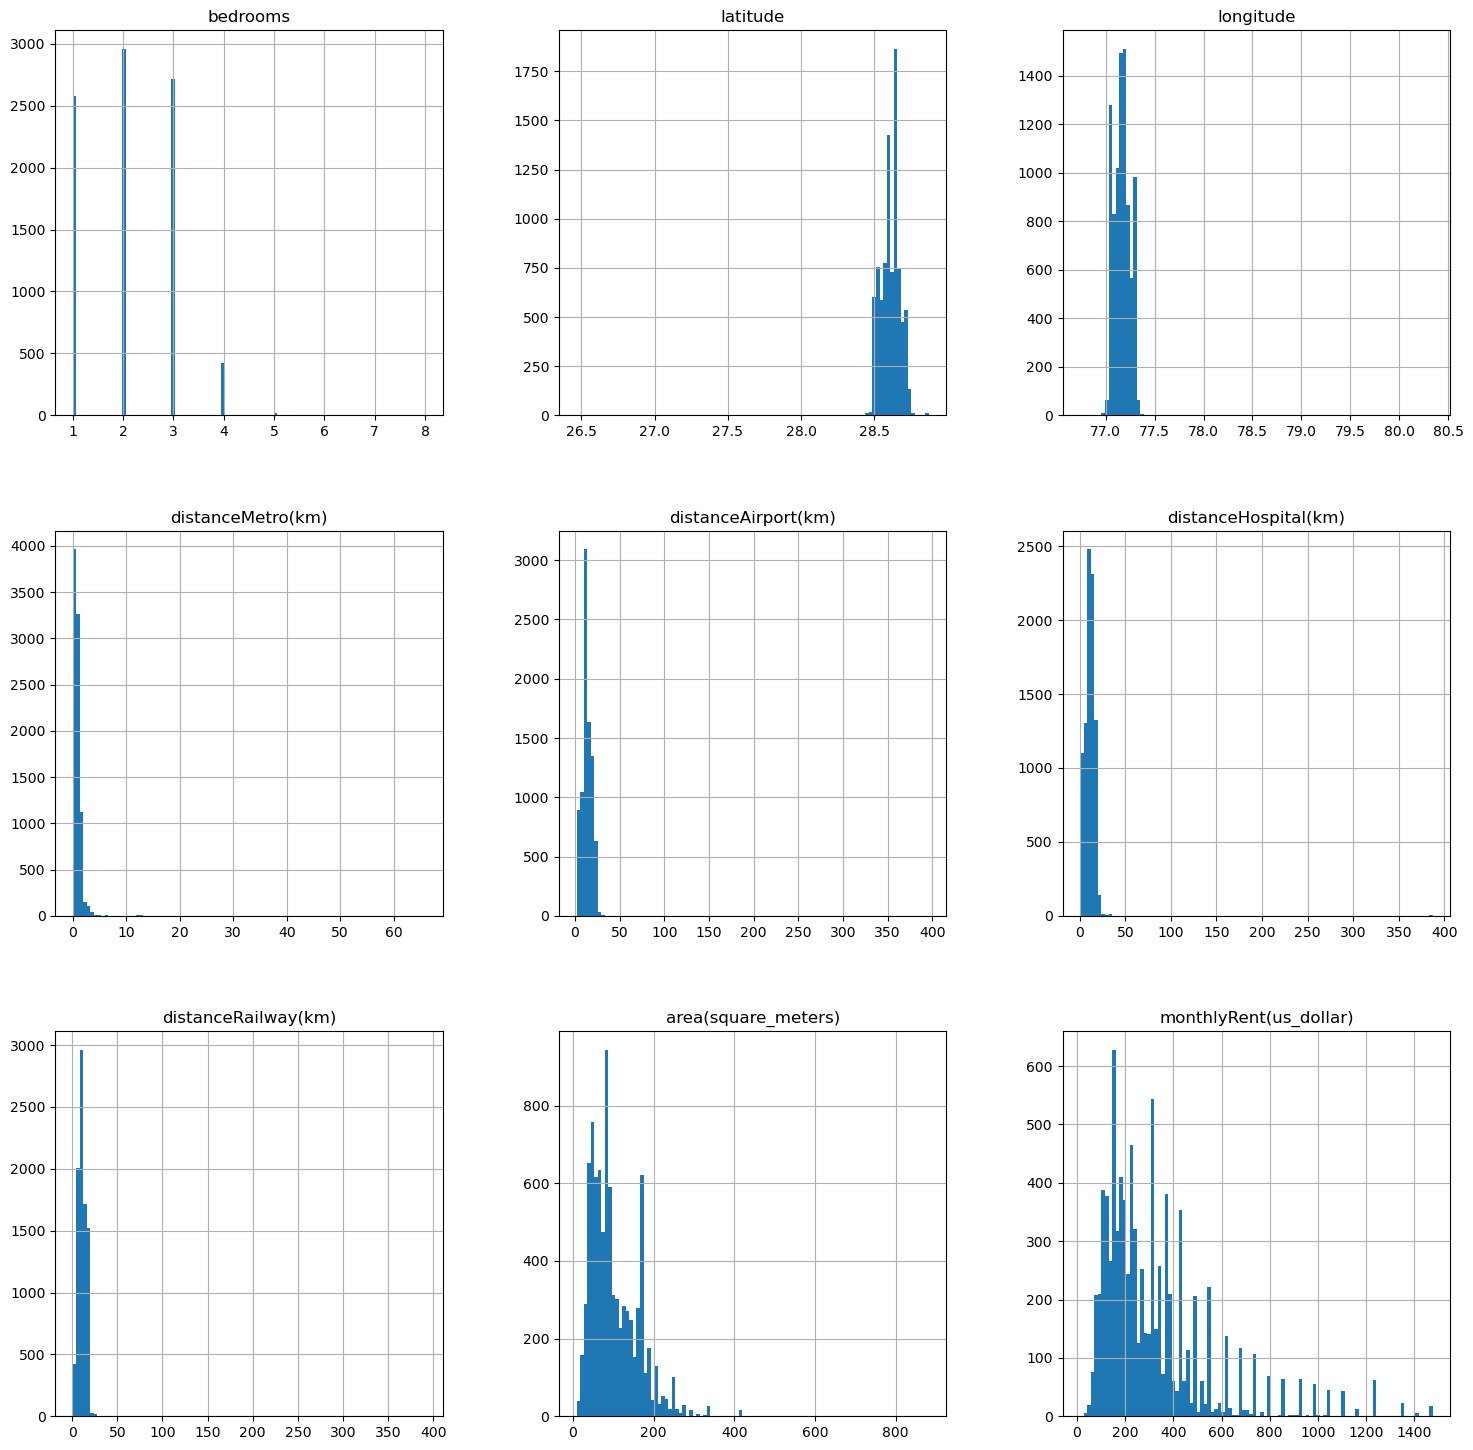

In [9]:
quan_df.hist(bins = 100, figsize = (18, 18))
plt.show()

## 질적 변수 확인 : countplot
- 질적 변수는 수치화가 되지 않으면 히스토그램으로 나타낼 수 없다
- 그러나 단순 수치화가 질적 변수의 특성을 적절하게 반영하지 못할 때가 많으므로, 
- 질적변수는 관측값의 빈도를 나타내는 countplot을 주로 이용한다

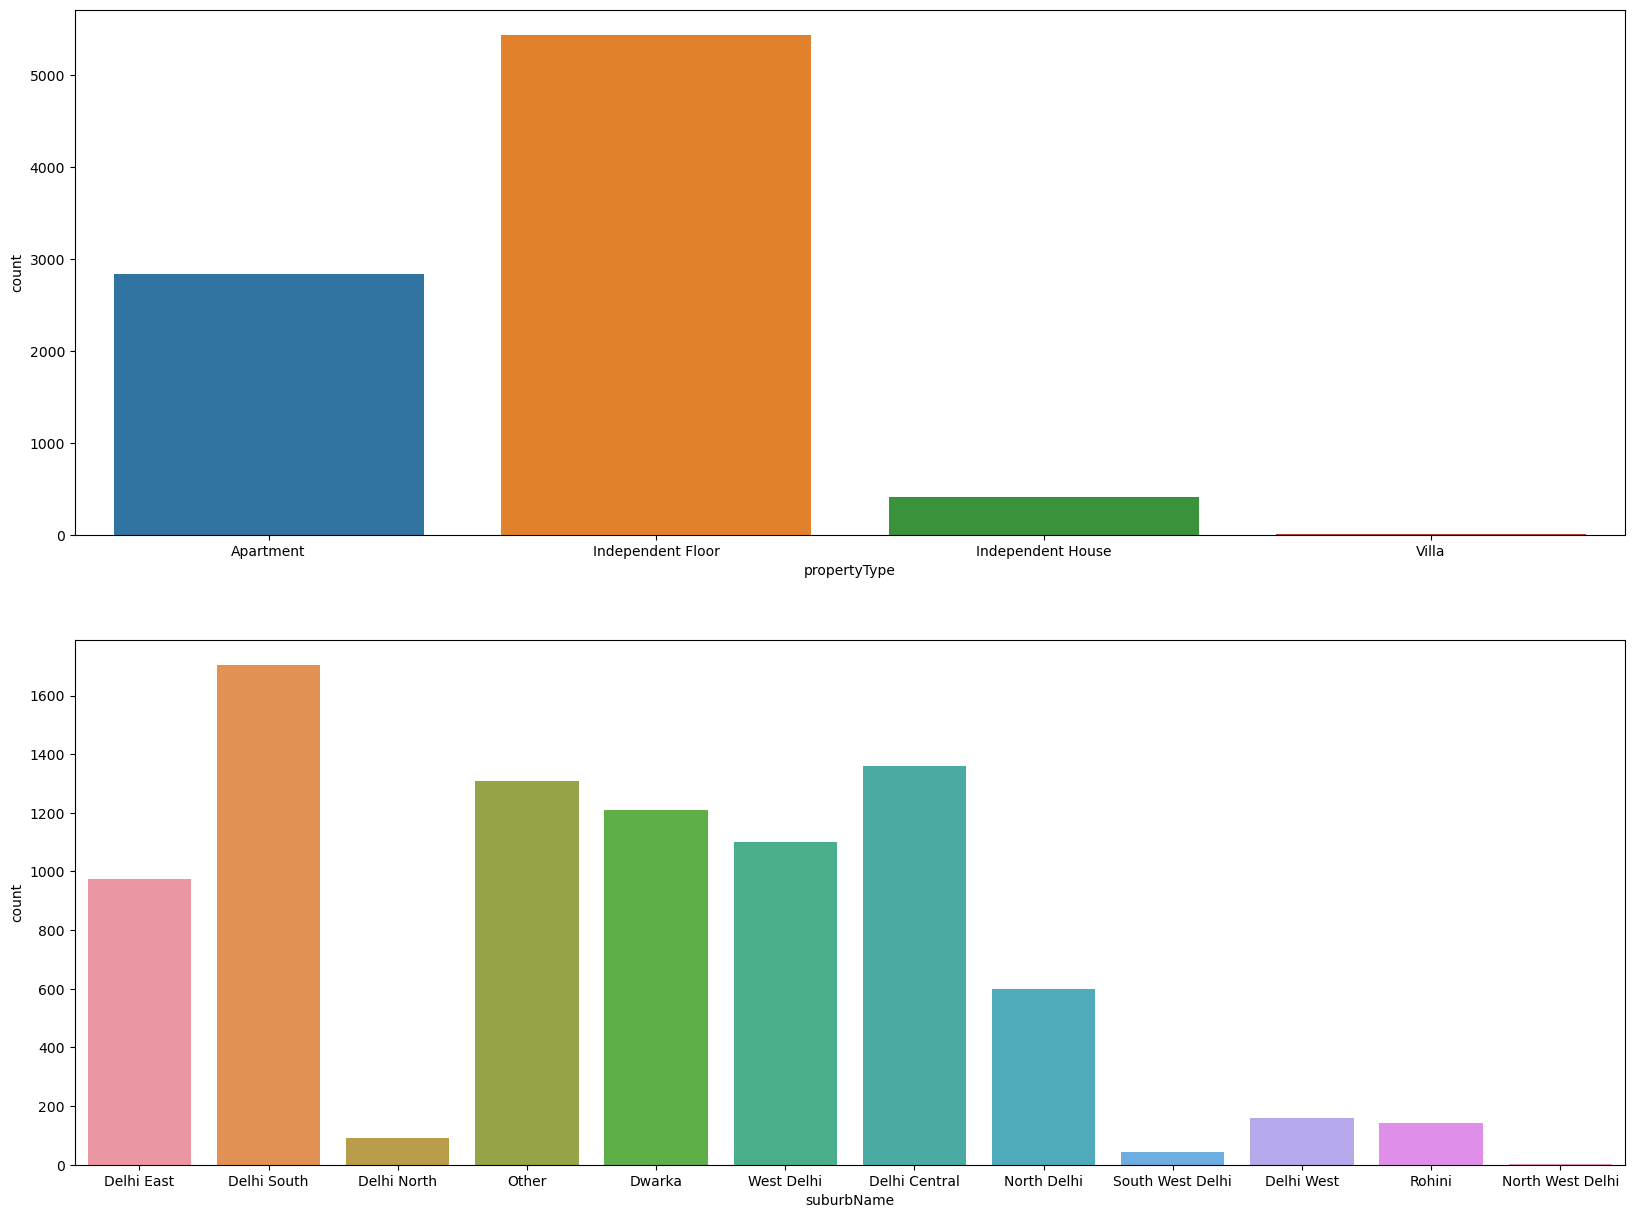

In [10]:
fig, axes = plt.subplots(2, 1, figsize = (20, 15))

sns.countplot(x = qual_df['propertyType'],ax = axes[0])
sns.countplot(x = qual_df['suburbName'], ax = axes[1])

plt.show()

## 이상치 확인 : boxplot

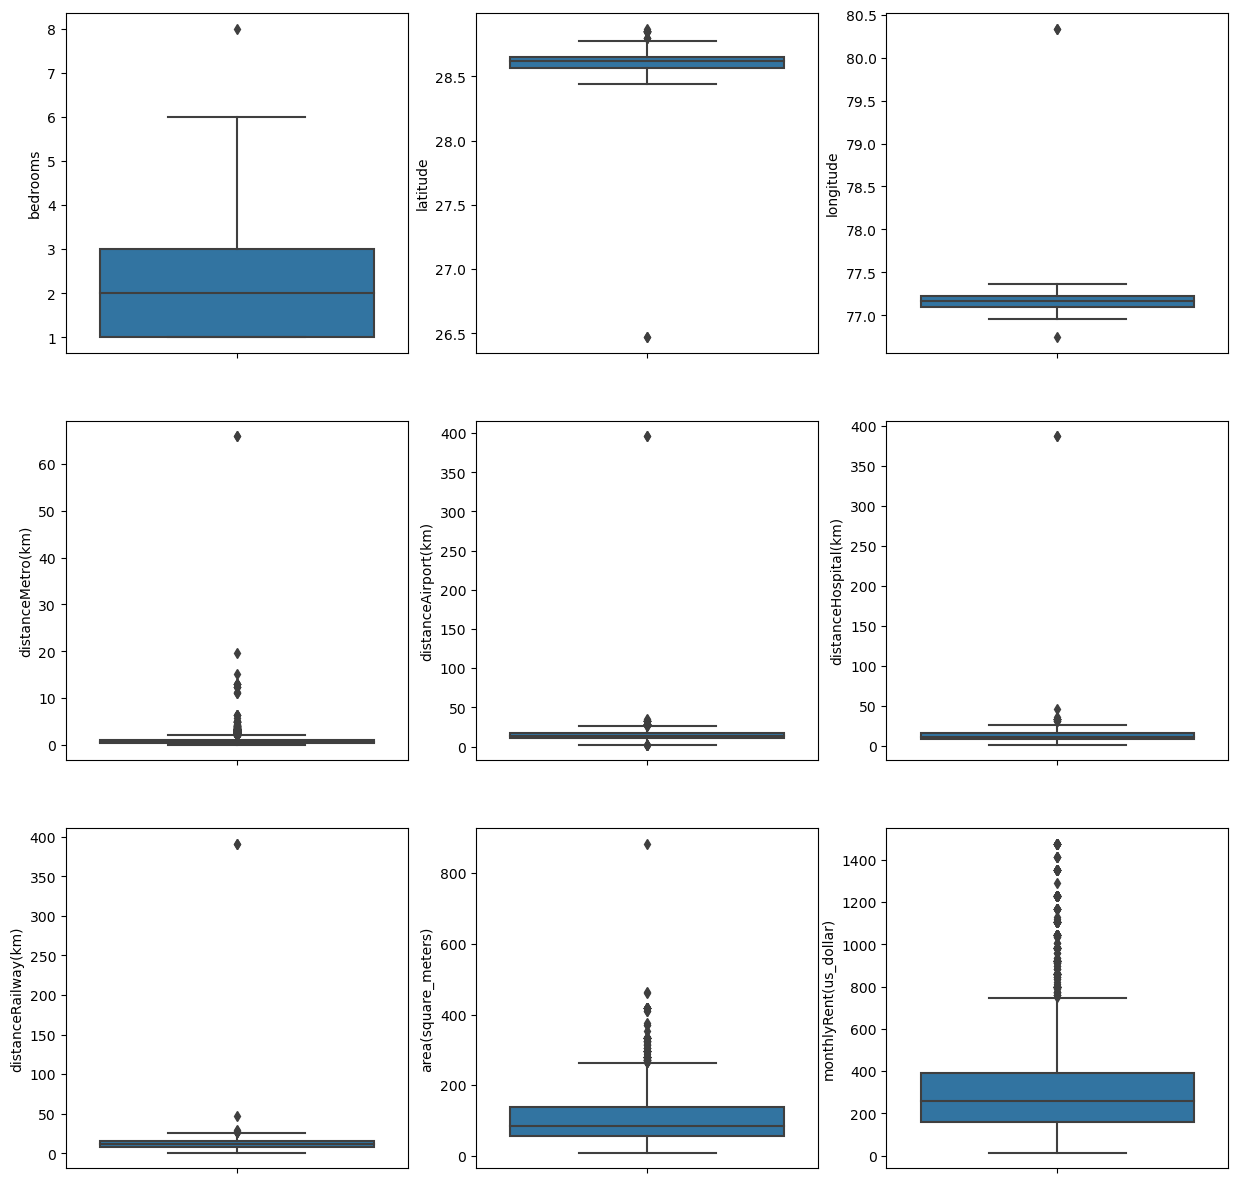

In [11]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(y = quan_df['bedrooms'], ax = axes[0][0])
sns.boxplot(y = quan_df['latitude'], ax=axes[0][1])
sns.boxplot(y = quan_df['longitude'], ax=axes[0][2])

sns.boxplot(y = quan_df['distanceMetro(km)'], ax=axes[1][0])
sns.boxplot(y = quan_df['distanceAirport(km)'], ax=axes[1][1])
sns.boxplot(y = quan_df['distanceHospital(km)'], ax=axes[1][2])

sns.boxplot(y = quan_df['distanceRailway(km)'], ax=axes[2][0])
sns.boxplot(y = quan_df['area(square_meters)'], ax=axes[2][1])
sns.boxplot(y = quan_df['monthlyRent(us_dollar)'], ax=axes[2][2])

plt.show()

## 상관관계 확인 : heatmap

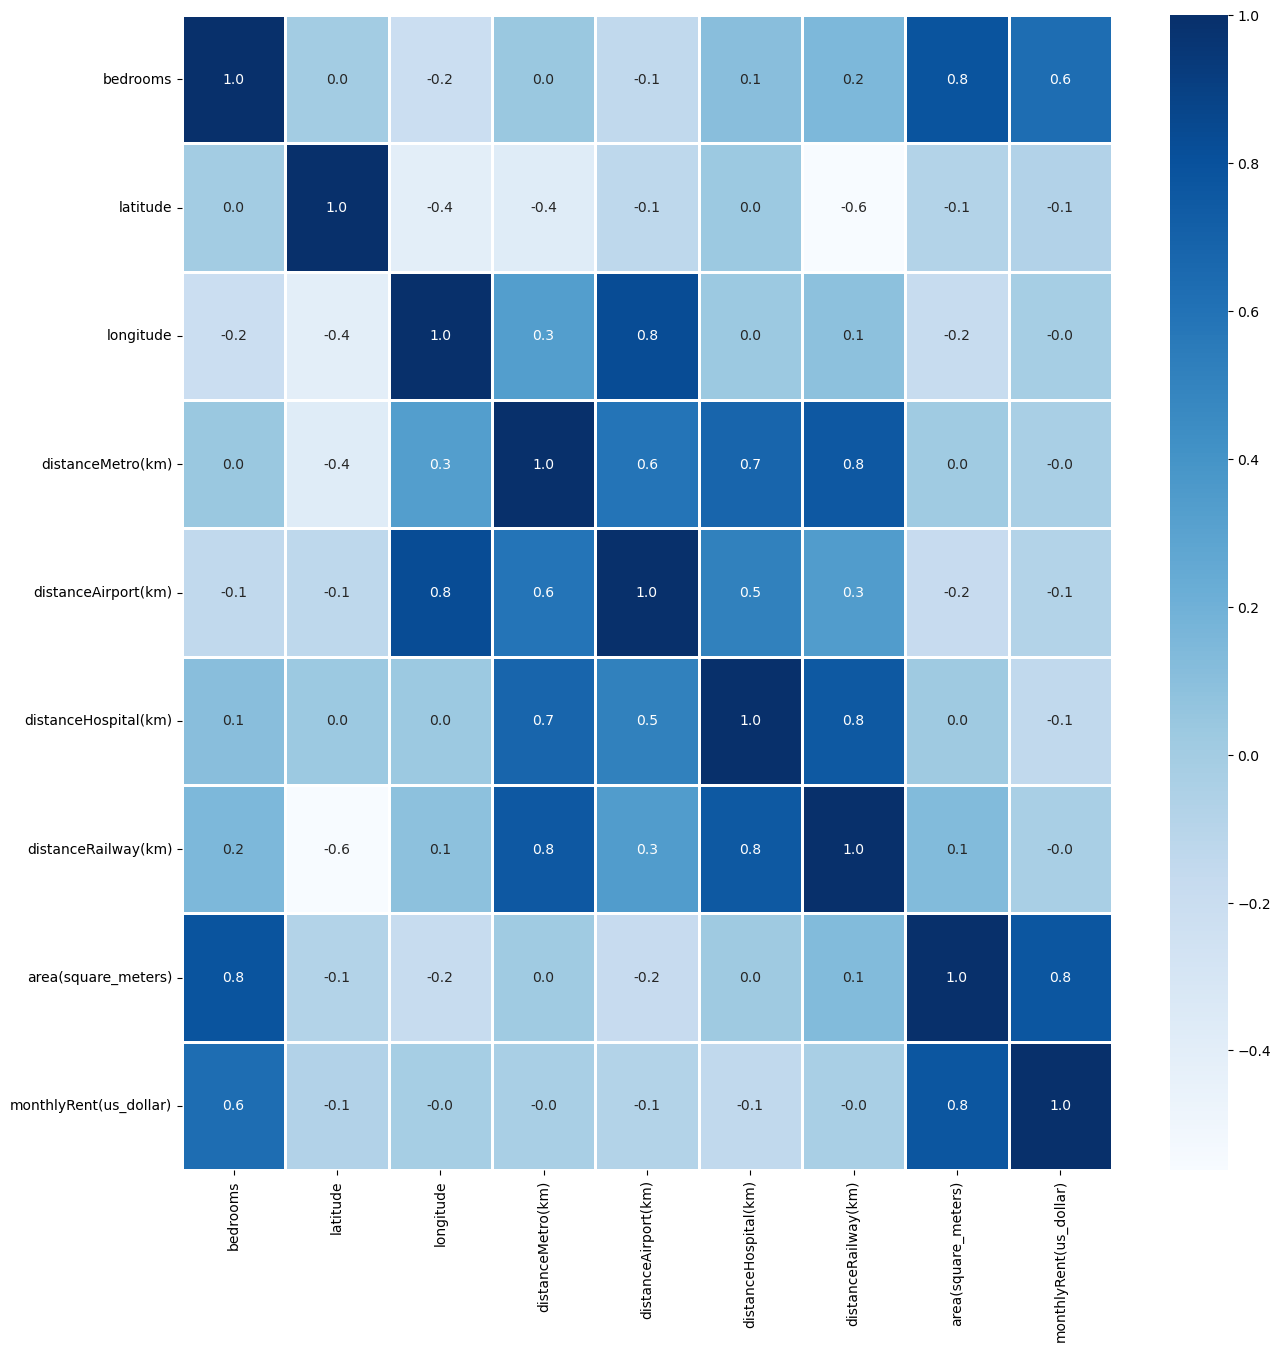

In [13]:
plt.figure(figsize = (15, 15))
sns.heatmap(total_df.corr(), annot = True, fmt = '.1f', linewidth = 1, cmap = 'Blues')
plt.show()

# One-Hot Encoding

In [16]:
import os
import numpy as np
import random

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge

### Fixed RandomSeed

In [17]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    
# seed 고정
seed_everything(42)

In [18]:
train_df = pd.read_csv('./train.csv')

In [19]:
train_x = train_df.drop(columns = ['ID', 'monthlyRent(us_dollar)'])
train_y = train_df['monthlyRent(us_dollar)']

In [20]:
test_x = pd.read_csv('./test.csv').drop(columns = ['ID'])

### Data pre-processing : One-Hot Encoding 
- 명목형 변수의 경우 값들 각각을 새로운 컬럼으로 만들고
- 원래 해당하던 값에는 1을,
- 아닐 경우 0을 부여

In [34]:
# 질적 컬럼 원핫인코딩

qual_col = ['propertyType','suburbName']
ohe = OneHotEncoder(sparse=False)

for i in qual_col :
    train_x = pd.concat([train_x, pd.DataFrame(ohe.fit_transform(train_x[[i]]), columns = ohe.categories_[0])], axis = 1)
    
    for qual_value in np.unique(test_x[i]):
        if qual_value not in np.unique(ohe.categories_):
            ohe.categories_ = np.append(ohe.categories_, qual_value)
            
    # One Hot Encoder가 Test 데이터로부터 Fitting되는 것은 Data Leakage이므로, 
    # Test 데이터에는 Train 데이터로 Fitting된 One Hot Encoder로부터 transform만 수행되어야 합니다.
    test_x = pd.concat([test_x, pd.DataFrame(ohe.transform(test_x[[i]]), columns = ohe.categories_[0])], axis = 1)

train_x = train_x.drop(qual_col, axis = 1)
test_x = test_x.drop(qual_col, axis=1)
print('Done')

Done


In [35]:
train_x.head()

,bedrooms,latitude,longitude,distanceMetro(km),distanceAirport(km),distanceHospital(km),distanceRailway(km),area(square_meters),Apartment,Independent Floor,...,Delhi North,Delhi South,Delhi West,Dwarka,North Delhi,North West Delhi,Other,Rohini,South West Delhi,West Delhi
0,3,28.638710,77.295822,0.312579,22.646032,11.726966,7.352495,83.61,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,28.498940,77.207191,2.486167,13.500583,7.527761,15.877066,83.61,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,28.714123,77.154404,1.528794,18.918243,17.135939,10.315737,78.97,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,28.704330,77.149956,0.967121,17.749252,16.251937,9.797817,162.58,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,28.577915,77.049446,0.834506,4.288189,15.541840,18.179806,218.32,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Hyperparameter Setting
- 본 Baseline에서 제공한 Ridge Regression 모델에서는 alpha를 Hyperparameter로 제공했습니다.
- alpha는 모델의 규제항으로, 모델의 오버피팅을 방지하는 역할을 합니다.

In [36]:
Model = Ridge(alpha = 1.0)

In [37]:
Model.fit(train_x, train_y)
print('Done')

Done


In [42]:
preds = Model.predict(test_x)
print('Done')

Done


In [43]:
submit = pd.read_csv('./sample_submission.csv')
submit.head()

,ID,monthlyRent(us_dollar)
0,Test_0000,0
1,Test_0001,0
2,Test_0002,0
3,Test_0003,0
4,Test_0004,0


In [45]:
submit['monthlyRent(us_dollar)'] = preds
submit.head()

,ID,monthlyRent(us_dollar)
0,Test_0000,160.295786
1,Test_0001,316.432405
2,Test_0002,364.173455
3,Test_0003,198.593732
4,Test_0004,59.764892
